In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from os import environ

# Grab env var
token = environ.get('ibmq_token')


In [5]:

# Loading your IBM Q account(s)
account = IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-03-16 16:25:42,507: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [7]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_lima


In [19]:
# quasm_sim not necessary
#simulator = Aer.get_backend('qasm_simulator')

In [8]:
from qiskit.tools.monitor import job_monitor

# circuit on q reg with 1 qubit
circuit = QuantumCircuit(2, 2)

# hadamard on A
circuit.h(0)

# CNOT on B controlled by A
circuit.cx(0 , 1)

circuit.measure([0, 1], [0, 1])

job = execute(circuit, backend, shots=1000)
job_monitor(job)

Job Status: job has successfully run


In [9]:

results = job.result()

counts = results.get_counts(circuit)

print(f"total count for 0 and 1 are: {counts}")

total count for 0 and 1 are: {'00': 518, '01': 22, '10': 27, '11': 433}


In [10]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

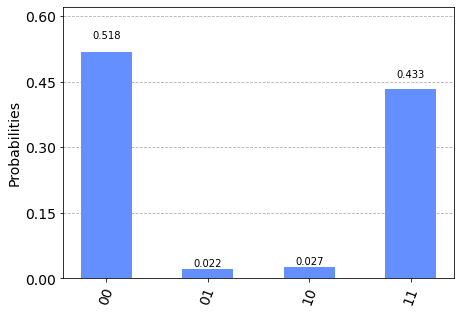

In [11]:
plot_histogram(counts)